<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

This is a continuation of forest_cover_type_detector_gr_a_Part3.

Below we import the files created in the previous notebook so that this notebook can run independently

Table of contents is an extension of the previous notebook

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* [Libaries used](#0)
* [1. Import Data](#1)
  * [1.1.Original Data & Standardization](#1.1)
  * [1.2.All features & Standardization](#1.2)  
  * [1.3.Features selected & Standardization](#1.3)   
  
* [2.__Rerun the model on selected Features__](#2)  
  * [2.1.Correlation Heatmap](#2.1)
      * [2.1.1 Removing correlated features](#2.1.1)
      
* [__7. ML Algorithms after feature selection__](#7)
  * [7.1 Decision Trees](#7.1)
      * [7.1.1 Single Tree](#7.1.1)
  * [7.2 XGBoost](#7.2)  
  * [7.3 Extra Tree Classifier](#7.3)
  * [7.4 Random Forest](#7.4)    
      * [7.4.1 Bagging](#7.1.1)  
  * [7.5 KNN](#7.5)
  * [7.6 SVM](#7.6)
  * [7.7 Naive Bayes](#7.7)
  * [7.8 Logistic Regression](#7.8)
  * [7.9 Ensemble Methods](#7.4)
  
  
* [__8. ML Algorithms after Dimensionality Reduction__](#8)
  * [8.1 PCA Dimensionality reduction ](#8.1)
      * [8.1.1 Random Forest](#8.1.1)
      * [8.1.2 XGBoost](#8.1.2)      
      * [8.1.3 Logistic Regression](#8.1.3)     
      * [8.1.4 Extra Tree Classifier](#8.1.4)
      * [8.1.5 Ensemble Methods](#8.1.5)      
  * [8.2 LDA Dimensionality reduction ](#8.2)      
  
* [9. Final Submission](#9)

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
#!pip install squarify
#!pip install GraphViz
#pip install pygraphviz
#!pip install pydotplus
#!pip install xgboost
#!pip install dtreeviz
#!pip install sklearn

In [2]:
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import plotly.express as px

import pydotplus
import xgboost as xgb
import matplotlib
import squarify


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import BernoulliNB #BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from dtreeviz.trees import *

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn import svm
from sklearn import metrics


from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA

#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.svm import SVC

from sklearn.compose import make_column_transformer

from sklearn.manifold import TSNE

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.tree import export_graphviz

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE

from IPython.display import Image  
from IPython.core.display import display, HTML
from IPython.display import Image  

from scipy.stats import uniform, randint
from scipy.stats import uniform, randint

from xgboost import XGBClassifier

from io import StringIO

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

warnings.simplefilter(action='ignore', category=FutureWarning)
display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_6940/4104195847.py:70: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



<a id='1'></a>
#  <font color=darkgreen>1.Import the Data </font>
<a id='1.1'></a>
###  <font color=green>1.1. Original Data </font>
Let’s load the data 

In [4]:
data_train = pd.read_csv("train.csv")

In [5]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)

In [6]:
data_test.shape

(565892, 55)

In [7]:
column_list = data_train.columns
num  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
cat= [column for column in column_list if column not in num]

In [8]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

<a id='1.2'></a>
## <font color=green> 1.2.All features & Standardization  <font>
 
Due to an excel import, it transforms to a new column unnamed

In [9]:
import pandas as pd
all_feat_df = pd.read_csv("all_features_data_train.csv")
all_feat_df = all_feat_df[all_feat_df.columns.drop(list(all_feat_df.filter(regex='Unnamed:')))]
pd.set_option('display.max_columns', None)
all_feat_df.head()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 1                 0                 0                 0   

   Cover_Type  Elevation_x_Aspect  Elevation_x_Slope  \
0           5              132396               7788   
1           5              145040               5180   
2           2              389756              25236   
3           2              431675              50130   
4           5              116775               5190   

   Elevation_x_Horizontal_Distance_To_Hydrology  \
0                                        669768   
1                                        549080   
2                                        751472   
3                                        673970   
4                                        397035   

   Elevation_x_Vertical_Distance_To_Hydrology  \
0                                           0   
1                                      -15540   
2                                      182260   
3                                      328630   
4                                       -2595   

   Elevation_x_Horizontal_Distance_To_Roadways  Elevation_x_Hillshade_9am  \
0                                      1323960                     573716   
1                                      1010100                     569800   
2                                      8916720                     656136   
3                                      8605650                     662830   
4                                      1014645                     570900   

   Elevation_x_Hillshade_Noon  Elevation_x_Hillshade_3pm  \
0                      602272                     384208   
1                      608650                     391090   
2                      667352                     378540   
3                      662830                     339770   
4                      607230                     389250   

   Elevation_x_Horizontal_Distance_To_Fire_Points  Aspect_x_Slope  \
0                                        16300284             153   
1                                        16122750             112   
2                                        17163284            1251   
3                                        17297635            2790   
4                                        16016340              90   

   Aspect_x_Horizontal_Distance_To_Hydrology  \
0                                      13158   
1                                      11872   
2                                      37252   
3                                      37510   
4                                       6885   

   Aspect_x_Vertical_Distance_To_Hydrology  \
0                                        0   
1                                     -336   
2                                     9035   
3                                    18290   
4                                      -45   

   Aspect_x_Horizontal_Distance_To_Roadways  Aspect_x_Hillshade_9am  \
0                                     26010                   11271   
1                                     21840                   12320   
2                                    442020                   32526   
3                                    478950                   36890   
4                                     17595                    9900   

   Aspect_x_Hillshade_Noon  Aspect_x_Hillshade_3pm  \
0                    11832                    7548   
1                    13160                    8456   
2                    33082                   18765   
3                    36890                   18910   
4                    10530                    6750   

   Aspect_x_Horizontal_Distance_To_Fire_Poin

From 55 features, we engineered a total of 165 additional ones

For scaling we need to exclude the dummy variables 

In [10]:
column_list = all_feat_df.columns
numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
categorial= [column for column in column_list if column not in numerical]

In [11]:
X_all = all_feat_df.drop(['Cover_Type'], axis=1)
y_all = all_feat_df['Cover_Type']
column_list = X_all.columns

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all, y_all, test_size=0.20, random_state=37,stratify=y_all)
print("The shape of validation data:{} and {} ".format(X_val_all.shape,y_val_all.shape))
print("The shape of training data:{} and {} ".format(X_train_all.shape,y_train_all.shape))

The shape of validation data:(3024, 107) and (3024,) 
The shape of training data:(12096, 107) and (12096,) 


<a id='1.3'></a>
##  <font color=green>1.3. Selected Model after Feature Selection & Standardization </font>


Selected features from the feature selection are transferred to cvs and used for further analysis. Above code is not active, we import directly csv from notebook part 2

In [12]:
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [13]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [14]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 34)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [15]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [16]:

#scaler = MinMaxScaler()

scaler = StandardScaler()

Splitting the data into train and validation test 

In [17]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=37,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))
y_val_new = y_val_new.values.ravel()
y_train_new = y_train_new.values.ravel()

The shape of validation data:(3024, 34) and (3024, 1) 
The shape of training data:(12096, 34) and (12096, 1) 


In [37]:
X_selected1

Wilderness_Area4  Wilderness_Area1  Subalpine_Climate  Alpine_Climate  \
0                     0                 1                  1               0   
1                     0                 1                  1               0   
2                     0                 1                  0               0   
3                     0                 1                  1               0   
4                     0                 1                  1               0   
...                 ...               ...                ...             ...   
15115                 0                 0                  0               0   
15116                 0                 0                  0               0   
15117                 0                 0                  0               0   
15118                 0                 0                  0               0   
15119                 0                 0                  0               0   

       binned_elevation  Wilderness_Area3  Road-Fire  Montane_Climate  \
0                    51                 0       5769                0   
1                    51                 0       5835                0   
2                    56                 0       2941                1   
3                    55                 0       3121                0   
4                    51                 0       5781                0   
...                 ...               ...        ...              ...   
15115                52                 1        622                0   
15116                52                 1        707                0   
15117                49                 1        852                0   
15118                49                 1        690                0   
15119                49                 1        644                0   

       Lower_Montane_Climate  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   
...                      ...   
15115                      1   
15116                      1   
15117                      1   
15118                      1   
15119                      1   

       Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points  \
0                                                3202290                      
1                                                2427750                      
2                                               19464780                      
3                                               19191990                      
4                                                2413252                      
...                                                  ...                      
15115                                             846120                      
15116                                             818850                      
15117                                             397645                      
15118                                             225544                      
15119                                             246780                      

       Elevation_x_Horizontal_Distance_To_Roadways  \
0                                          1323960   
1                                          1010100   
2                                          8916720   
3                                          8605650   
4                                          1014645   
...                                            ...   
15115                                      1720620   
15116                                      1608654   
15117                                       834820   
15118                                       601854   
15119                                       668250   

       Sqr_Horizontal_Distance_To_Roadways  Road-Hydro  Road+Fire+Hydro  \
0                                22.583180         252             7047   
1                                19.

<a id='2'></a>
# <font color=darkgreen> 2.Re-run models with the new selected features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. 
    
Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 

In [18]:
# Create a dataFrame to compare performance of Classifier Models in the End
classifiers_compare = pd.DataFrame(columns =['Algorithm','Mean CV Score'])

<a id='8'></a>
#  <font color=darkgreen>8.ML Algorithms after Dimensionality Reduction </font>

<a id='8.1'></a>
## <font color=green> 8.1. PCA Dimensionality reduction<font>

Principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. 

Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. We are running it on the dataset where we have all seleted features and will use PCA to identify the most important features. 

For the visualization part we are using https://plotly.com/python/pca-visualization/. 

Using the first 2 principle components show that the data with 2 PCAs is very well deferiantiated. We are using all features to test it against the initial selected features from the previous models. 

With only two PCA you can nicely see how well the data is differentiated among the different Cover Types. 

In [21]:
#Using a 2D Diagram for the two PCAs 
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
#using the normalised dataset 
components = pca.fit_transform(X_train_new)

fig = px.scatter(components, x=0, y=1, color=y_train_new)
fig.show()

First we will observe with a 3D Diagram the first three PCAs


In [23]:

pca = PCA(n_components=3)
components = pca.fit_transform(X_train_new)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train_new,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

We run a PCA that holds 95% of all variance of the data

In [24]:
# Run PCA that holds 95% of all variance of the data 
pca = PCA()
x_fit = pca.fit(X_train_new)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

Looking at the two first PCA to see if these can explain the dataset.You can set the components to the ratio of variance you wish to preserve

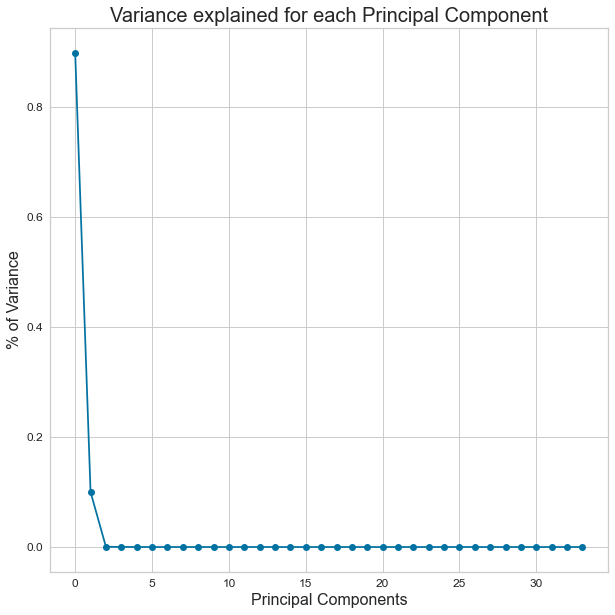

In [25]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

It is very clear that after 2 components, the curve flattens

In [26]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# of Principle Components", "y": "Cumulative Explained Variance"})

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

Text(0, 0.5, 'Proportion of Variance Explained')

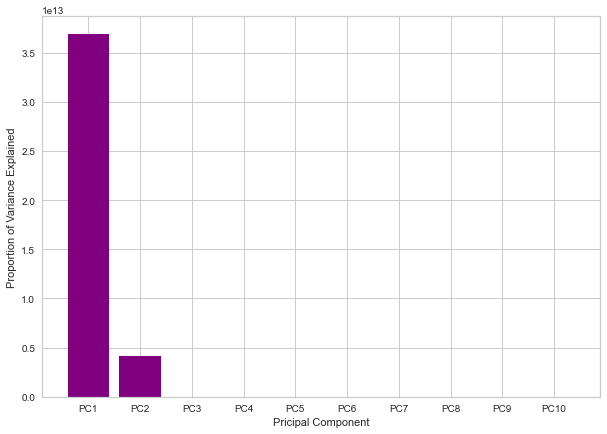

In [27]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

On top of that, we can also look at the combinations of variables that created each principal component with pca. We could use a heat map to showcase the correlation betweem the PCAs between each other. 

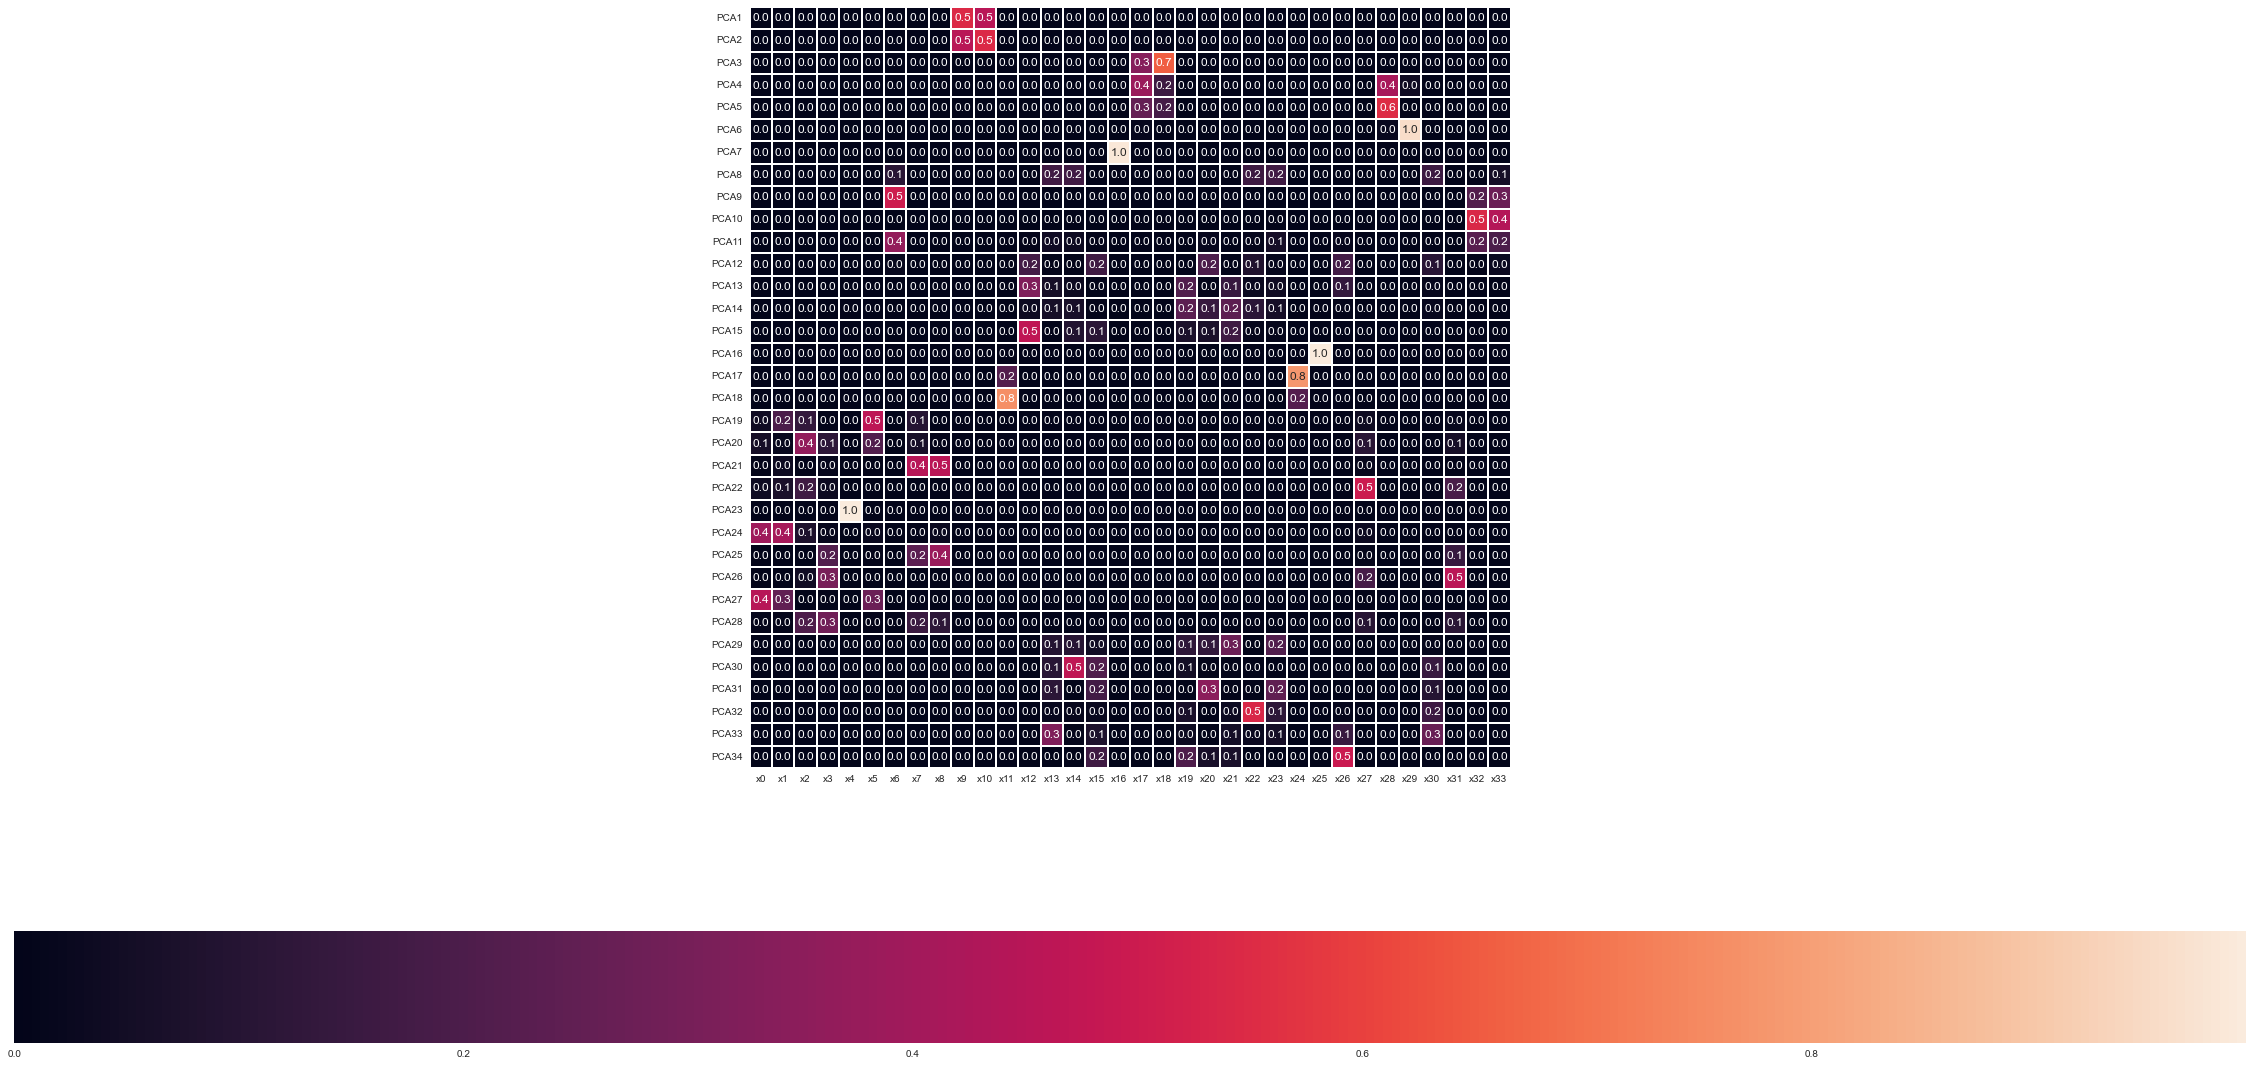

In [28]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train_new.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [29]:
pca_ratio = pca.explained_variance_ratio_
pca_ratio_tranposed = list(map(list, zip(*[pca_ratio])))
df = pd.DataFrame(data = np.array(pca_ratio_tranposed), columns = ['PCA Variance Explained'])
df['PCA Variance Explained Cumulative'] = df['PCA Variance Explained'].cumsum()
df.index += 1
df

PCA Variance Explained  PCA Variance Explained Cumulative
1             8.992848e-01                           0.899285
2             1.000692e-01                           0.999354
3             4.000015e-04                           0.999754
4             1.719298e-04                           0.999926
5             5.481459e-05                           0.999981
6             1.874598e-05                           0.999999
7             4.664797e-07                           1.000000
8             3.946520e-08                           1.000000
9             1.594146e-08                           1.000000
10            7.926605e-09                           1.000000
11            1.903331e-09                           1.000000
12            9.639343e-10                           1.000000
13            3.194991e-10                           1.000000
14            9.988146e-11                           1.000000
15            3.030550e-11                           1.000000
16            1.517959e-13                           1.000000
17            7.769596e-14                           1.000000
18            4.644721e-14                           1.000000
19            6.530029e-15                           1.000000
20            5.192364e-15                           1.000000
21            4.044742e-15                           1.000000
22            2.750251e-15                           1.000000
23            2.026573e-15                           1.000000
24            1.730861e-15                           1.000000
25            1.415752e-15                           1.000000
26            4.797659e-16                           1.000000
27            1.655112e-16                           1.000000
28            1.323284e-16                           1.000000
29            7.038933e-33                           1.000000
30            7.038933e-33                           1.000000
31            7.038933e-33                           1.000000
32            7.038933e-33                           1.000000
33            7.038933e-33                           1.000000
34            7.038933e-33                           1.000000

Looks Like most variance (99.1%) is explained once we reach 12 principal components, so let’s create training and validation data sets using the first 12 principal components

In [42]:
pca_mod = PCA(n_components=4)
PCA_X_train_final_selected = pca_mod.fit_transform(X_train_new)
PCA_X_val_final_selected = pca_mod.fit_transform(X_val_new)
print("Size of the dimensionality reduced training dataset", PCA_X_train_final_selected.shape)
print("Size of the dimensionality reduced training dataset", PCA_X_val_final_selected.shape)

Size of the dimensionality reduced training dataset (12096, 4)
Size of the dimensionality reduced training dataset (3024, 4)


In [43]:
PCA_X_train_final_selected[0]

array([-5080115.08625842,  1251303.92121361,    39873.71664818,
        -150801.96127989])

Check which most important features were selected using PCA. 

In [44]:
pca_mod = PCA(n_components=4)

model = pca_mod.fit(X_train_new)
X_pc = model.transform(X_train_new) 

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train_new.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [45]:
df

0                                                  1
0  PC0  Horizontal_Distance_To_Roadways_x_Horizontal_D...
1  PC1        Elevation_x_Horizontal_Distance_To_Roadways
2  PC2                          Elevation_x_Hillshade_9am
3  PC3    Horizontal_Distance_To_Roadways_x_Hillshade_9am


Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [46]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,19)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X_train_new, y_train_new);

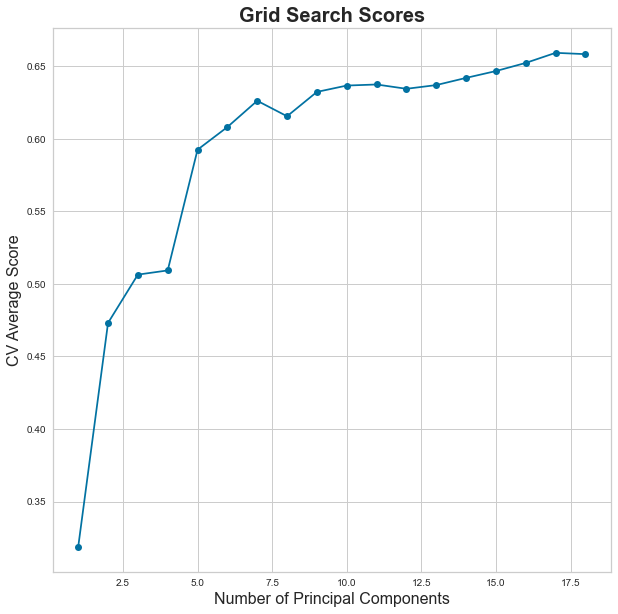

In [47]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')

As can be seen in the graph, the optimal number of PCs to select will 12 as this gives us the optimal CV score. The optimum is 12 and increasing the number of features does not add much value. 

Source codes: https://www.kaggle.com/code/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne, https://github.com/dasaditi/machineLearning/blob/master/forestCover/ForestCover.ipynb

<a id='8.1.1'></a>
## <font color=green> 8.1.1. Random Forest<font>

Fine tuning the model and checking the performance of the PCA method

In [48]:
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_rf = dict(n_estimators=n_estimators,criterion=criterion)

# instantiate and fit the grid
rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy' ,return_train_score=False)

grid_rf.fit(PCA_X_train_final_selected, y_train_new)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                                                         80, 85, 90, 95, 100,
                                                         105, 110, 115, 120,
                                                         125, 130, 135, 140,
                                                         145, 150, 155, 160,
                                                         165, 170, 175, 180,
                                                         185, 190, 195, ...]},
                   scoring='accuracy')

Here we get the best combination of hyperparameters yielding the best score

In [49]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_rf.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_rf.best_params_)

The best score:  0.6919
The best parameter:  {'n_estimators': 230, 'criterion': 'gini'}


In [50]:
rf_final = RandomForestClassifier(criterion=grid_rf.best_params_['criterion'],
                            n_estimators=grid_rf.best_params_['n_estimators'])
rf_final.fit(PCA_X_train_final_selected,y_train_new)
rf_score=rf_final.score(PCA_X_val_final_selected,y_val_new)

print("The accuracy score of the RandomForest with reduced feature set: ",round(rf_score,2))

The accuracy score of the RandomForest with reduced feature set:  0.64


With cross validation you can see it overfits the train data und the result of the validation data is lower

In [51]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(rf_final, PCA_X_val_final_selected, y_val_new))))


Accuracy = 0.6260


As you can see the model is overitting on the Training Set and has a lower score on the cross validation score.

In [52]:
#the plot learning curve from sklearn works only if you add the definition of sklearn 


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

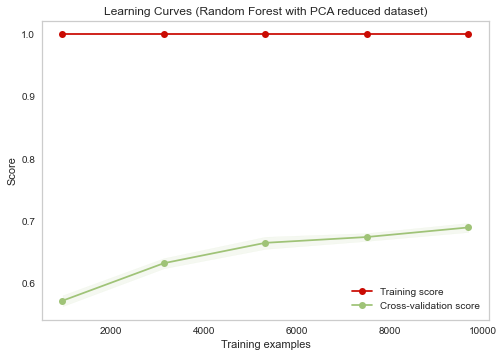

In [53]:
#cv = ShuffleSplit(n_splits=500, test_size=0.2, random_state=0)
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(rf_final, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()


<a id='8.1.2'></a>
## <font color=green> 8.1.2 XGBoost<font>

We continue following the same dynamic, fitting the pca df and finiding the best hyperparameters

In [54]:
le = LabelEncoder()
y_train_PCA = le.fit_transform(y_train_new)
y_val_PCA = le.fit_transform(y_val_new)

In [55]:
def xgb_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'max_depth': [10] , 'min_child_weight':[4,5,6] ,'learning_rate': [0.05,0.1,0.5] ,'n_estimators': [20,50,100] }
    # decision tree model
    xgb_model=XGBClassifier()
    #use gridsearch to test all values
    xgb_gscv = GridSearchCV(xgb_model, param_grid, cv=nfolds)
    #fit model to data
    xgb_gscv.fit(X, y)
    print(xgb_gscv.best_params_)
    print(xgb_gscv.best_estimator_)
    print(xgb_gscv.best_score_)

In [56]:
xgb_grid_search(PCA_X_train_final_selected,y_train_PCA,3)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
0.658316798941799


In [57]:
xgb_model=XGBClassifier(max_depth=10,min_child_weight =5, n_estimators=100,learning_rate=0.5)
xgb = xgb_model.fit(PCA_X_train_final_selected,y_train_PCA)


In [58]:
xgb_acc_sel =xgb.score(PCA_X_val_final_selected,y_val_PCA)
print("The accuracy score of the XGBoost with PCA reduced feature set: ",round(xgb_acc_sel,2))

The accuracy score of the XGBoost with PCA reduced feature set:  0.63


The resulting score is in line with the ones achieved so far

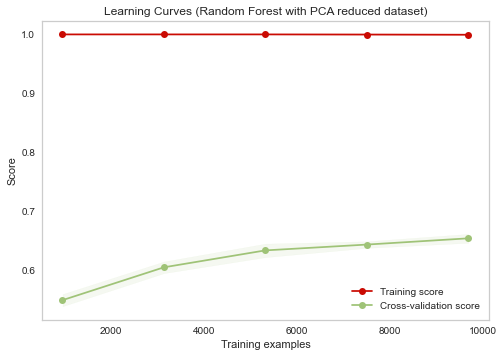

In [59]:
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(xgb_model, title, PCA_X_train_final_selected, y_train_PCA, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()

<a id='8.1.3'></a>
## <font color=green> 8.1.3 Extra Trees Classifier <font>

In [60]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
#min_samples_leaf = list(range(5, 25))
#min_samples_split = list(range(5, 25))
#max_depth = list(range(8, 50))
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(PCA_X_train_final_selected, y_train_new)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

The best score:  0.6968
The best parameter:  {'n_estimators': 160, 'criterion': 'entropy'}


ExtraTreesClassifier(criterion='entropy', n_estimators=160, random_state=0)

In [61]:
 #Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_selected.fit(PCA_X_train_final_selected, y_train_new)
etc_sel_acc = etc_selected.score(PCA_X_val_final_selected, y_val_new)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))
print("CV Accuracy = {0:.4f}".format(np.mean(cross_val_score(etc_selected, PCA_X_val_final_selected, y_val_new))))


The accuracy score of the ExtraTreesClassifier with the selected features:  0.66
CV Accuracy = 0.6303


The CV score is somehow smaller than with previous methods

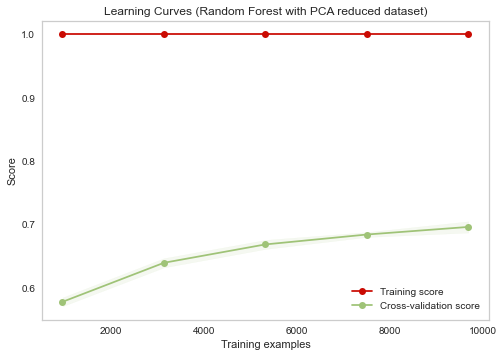

In [62]:
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(etc_selected, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()

<a id='8.1.4'></a>
## <font color=green> 8.1.4 Ensemble Methods <font>

__Voting Classifier__   

A very simple way to create an even better classifier is to aggregate the best predictions of each classifier and predict the class that gets the most votes. Normally this method is a better predictor than the single models.  

In [63]:
eclf = VotingClassifier(estimators=[
    ('Extra Tree', etc_selected), ('Random Forest',rf_final),('xgboost',xgb)],voting='hard')
eclf.fit(PCA_X_train_final_selected, y_train_PCA)
y_val_pred = eclf.predict(PCA_X_val_final_selected)
print("CV Accuracy = {0:.4f}".format(np.mean(cross_val_score(eclf, PCA_X_val_final_selected, y_val_PCA))))


CV Accuracy = 0.6329


Because we have more models scoring lower than 80%, it brings the score to 63%

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



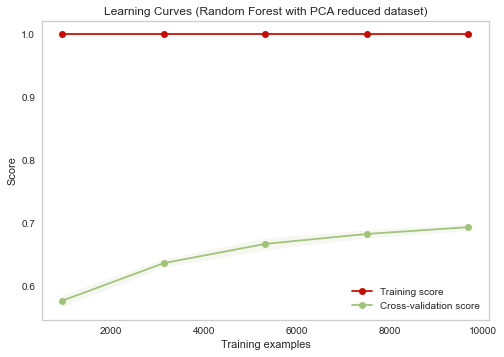

In [64]:
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(eclf, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()

<a id='8.2'></a>
## <font color=green> 8.2. Linear Discriminant Analysis (LDA)<font>


LDA, much like PCA is also a linear transformation method commonly used in dimensionality reduction tasks. However unlike the latter which is an unsupervised learning algorithm, LDA falls into the class of supervised learning methods. 

As such the goal of LDA is that with available information about class labels, LDA will seek to maximise the separation between the different classes by computing the component axes (linear discriminants ) which does this.

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
lda= lda(n_components=5) # n_components in this case is 1 less than the number of classes
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new )


In [66]:
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=2)

# Train lda on the first half of the digits
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new,)

In [67]:
# To produce an interactive chart 
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = '',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train_new,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = dict(title = 'LDA (Linear Discriminant Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

<a id='9'></a>
#  <font color=darkgreen>9.Final Submission </font>

pred=forest.predict(data_test.drop(labels=['Id','Wilderness','Soil'], axis=1))
 
 
 
submission=pd.DataFrame(data=pred,columns=['Cover_Type'])
submission
 
 
 
submission['Id']=data_test['Id']
submission